In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

from sklearn.manifold import TSNE
import nltk
import re
import seaborn as sns
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA, KernelPCA
from sklearn.decomposition import LatentDirichletAllocation

In [2]:
df = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\NLP-and-Topic-Modeling-on-User-Review-Dataset-master\NLP-and-Topic-Modeling-on-User-Review-Dataset-master\Review_data.csv")

In [4]:
df.head(2)

review_body  star_rating
0  Good luck finding a reasonably priced band rep...            1
1  No i get dark on the first week with me!! I wi...            1

In [5]:
# Cheching if there is any missing value
df.isnull().sum()

review_body    0
star_rating    0
dtype: int64

In [6]:
df.star_rating.value_counts()

1    3000
2    3000
3    3000
4    3000
5    3000
Name: star_rating, dtype: int64

In [19]:
# Use nltk's English stopwords.
# nltk.download('stopwords')
stpwords = stopwords.words('english')

In [25]:
def tokenization_and_stemming(text):
    '''
    INPUT
    text - string
    OUTPUT
    clean_tokens - a list of words
    This function processes the input using the following steps :
    1. Remove punctuation characters
    2. Tokenize text into list
    3. Stem, Normalize and Strip each word
    4. Remove stop words
    '''
    # Remove punctuation characters and numbers
    text = re.sub(r"[^a-zA-Z]", " ", text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Create a instance of stem class
    stemmer = SnowballStemmer("english")
    
    clean_tokens = []
    for word in tokens:
        clean_tok = stemmer.stem(word).lower().strip()
        if clean_tok not in stpwords:
            clean_tokens.append(clean_tok)

    return clean_tokens

In [26]:
data = df.loc[:, 'review_body'].tolist()
tokenization_and_stemming(data[42])

['warranti', 'card', 'box']

In [27]:
tfidf_model = TfidfVectorizer(
    max_df=0.99, # max_df : maximum document frequency for the given word
    max_features=1000, # max_features: maximum number of words
    min_df=0.01, # min_df : minimum document frequency for the given word
    use_idf=True, # use_idf: if not true, we only calculate tf
    tokenizer=tokenization_and_stemming,
    ngram_range=(1,1) # ngram_range: (min, max), eg. (1, 2) including 1-gram, 2-gram
)


# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 15000 reviews and 445 terms.


In [28]:
# Check the parameters
tfidf_model.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.99,
 'max_features': 1000,
 'min_df': 0.01,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': <function __main__.tokenization_and_stemming(text)>,
 'use_idf': True,
 'vocabulary': None}

In [29]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [36]:
tfidf_matrix

<15000x445 sparse matrix of type '<class 'numpy.float64'>'
	with 238491 stored elements in Compressed Sparse Row format>

In [37]:
tfidf_matrix_np=tfidf_matrix.toarray()

In [46]:
tfidf_matrix_np

array([[0.        , 0.        , 0.        , ..., 0.20732124, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

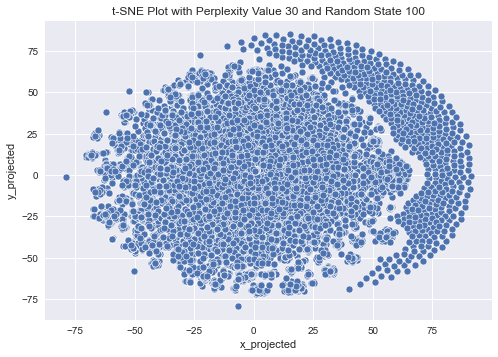

In [51]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

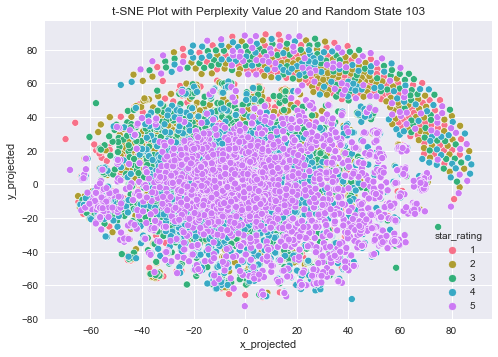

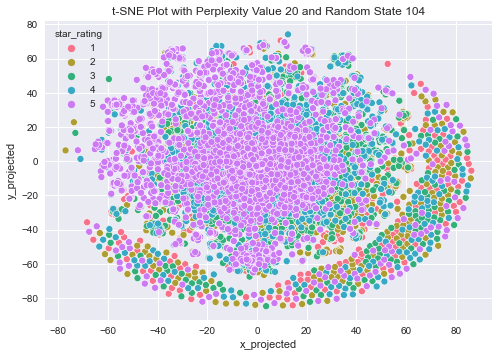

--------------------------------------------


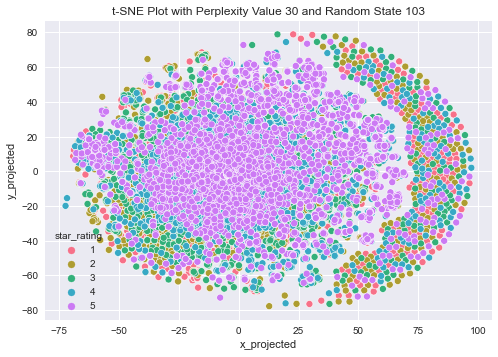

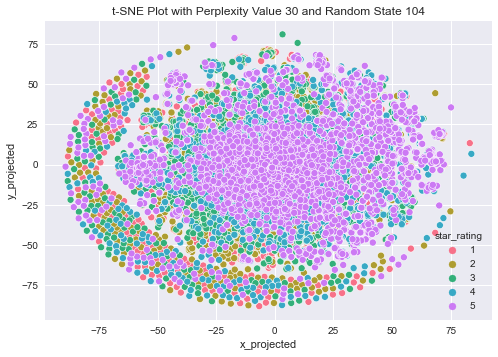

--------------------------------------------


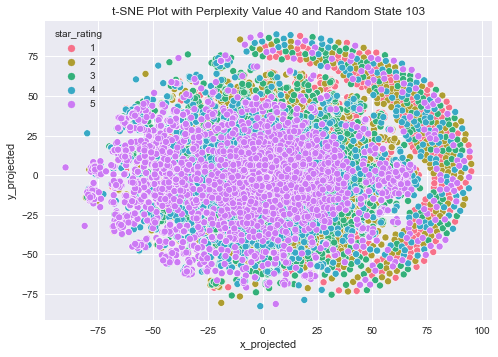

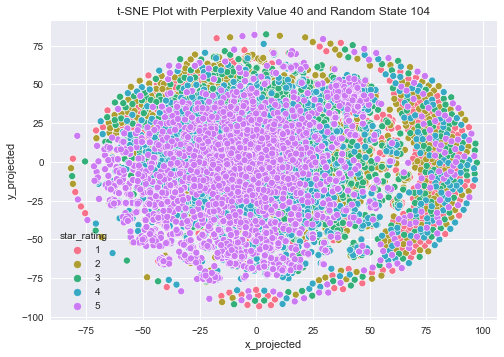

--------------------------------------------


In [53]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='star_rating', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 2

In [76]:
df2 = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\UIUC-STAT430-Unsupervised-Learning\Final_Project\Data\Arts.txt\Arts.txt",
                 delimiter='\t')

In [79]:
df2 = df2.iloc[9:,:]

In [80]:
df2.head(15)

product/productId: B000GKXY4S
9                       product/productId: B000GKXY4S
10             product/title: Crazy Shape Scissor Set
11                             product/price: unknown
12                       review/userId: ALCX2ELNHLQA7
13                        review/profileName: Barbara
14                            review/helpfulness: 0/0
15                                  review/score: 5.0
16                            review/time: 1328659200
17                    review/summary: Making the cut!
18  review/text: Looked all over in art supply and...
19                      product/productId: B000140KIW
20  product/title: Fiskars Softouch Multi-Purpose ...
21                             product/price: unknown
22                      review/userId: A2M2M4R1KG5WOL
23                    review/profileName: L. Heminway

In [88]:
txt = 'product/productId: B000GKXY4S'
re.search('(.*:)(.*)', txt).group(2).strip()

'B000GKXY4S'

In [95]:
val = [re.search('(.*:)(.*)', x).group(2).strip() for x in df2.iloc[:, 0]]
key = [re.search('(.*:)(.*)', x).group(1).strip() for x in df2.iloc[:, 0]]

In [97]:
df2_ = pd.DataFrame.from_dict({'key':key, 'val':val})

In [138]:
df2_ = pd.DataFrame(columns=key[:10])

In [141]:
for i in range(0, int(len(val)/10)):
    item = val[10*i:10*(i+1)]
    d = {df2_.columns[0]:item[0],
     df2_.columns[1]:item[1],
     df2_.columns[2]:item[2],
     df2_.columns[3]:item[3],
     df2_.columns[4]:item[4],
     df2_.columns[5]:item[5],
     df2_.columns[6]:item[6],
     df2_.columns[7]:item[7],
     df2_.columns[8]:item[8],
     df2_.columns[9]:item[9],
}
    df2_ = df2_.append(d, ignore_index=True)
    
print(i)

27978


In [148]:
df2 = df2_.copy()

In [154]:
df2.head(2)

product/productId:                               product/title:  \
0         B000GKXY4S                      Crazy Shape Scissor Set   
1         B000140KIW  Fiskars Softouch Multi-Purpose Scissors 10"   

  product/price:  review/userId: review/profileName: review/helpfulness:  \
0        unknown   ALCX2ELNHLQA7             Barbara                 0/0   
1        unknown  A2M2M4R1KG5WOL         L. Heminway                 1/1   

  review/score: review/time:                               review/summary:  \
0           5.0   1328659200                               Making the cut!   
1           5.0   1156636800  Fiskars Softouch Multi-Purpose Scissors, 10"   

                                        review/text:  
0  Looked all over in art supply and other stores...  
1  These are the BEST scissors I have ever owned....

In [156]:
data = df2.loc[:, 'review/text:'].tolist()
tokenization_and_stemming(data[42])

['caution',
 'wast',
 'time',
 'money',
 'onli',
 'receiv',
 'one',
 'canva',
 'six',
 'like',
 'product',
 'say',
 'titl',
 'seller',
 'feedback']

In [157]:
# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 27979 reviews and 588 terms.


In [159]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [158]:
tfidf_matrix

<27979x588 sparse matrix of type '<class 'numpy.float64'>'
	with 557493 stored elements in Compressed Sparse Row format>

In [160]:
tfidf_matrix_np=tfidf_matrix.toarray()

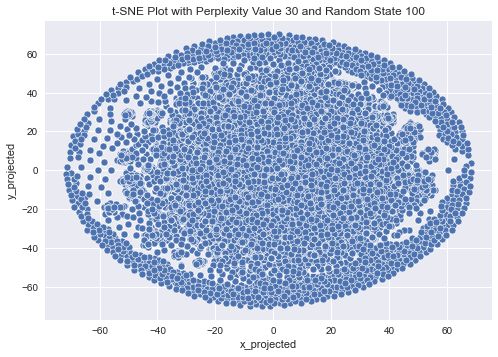

In [161]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

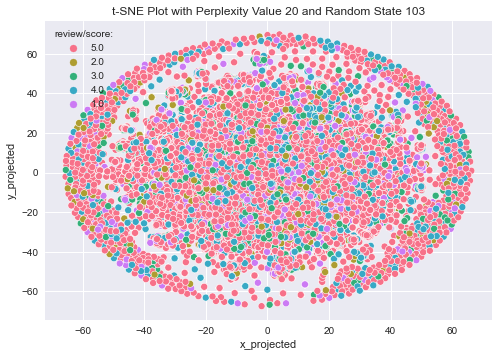

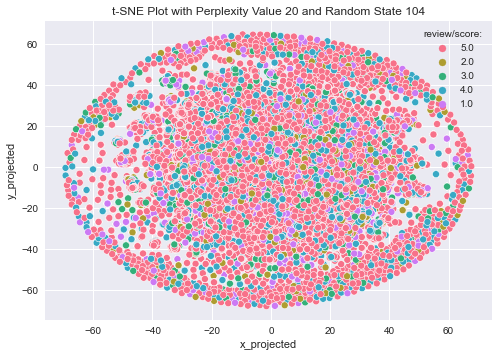

--------------------------------------------


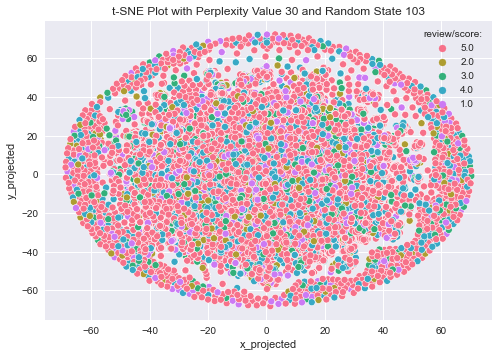

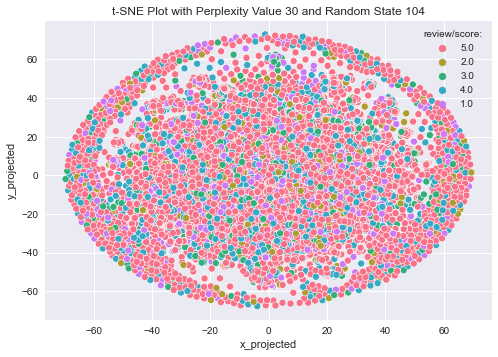

--------------------------------------------


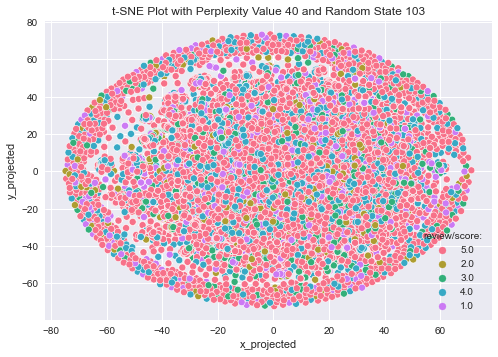

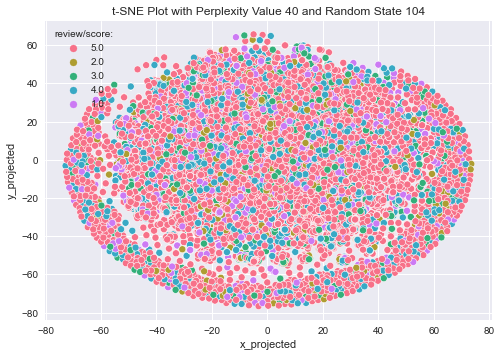

--------------------------------------------


In [163]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df2, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='review/score:', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')

## Dataset 3

In [165]:
df3 = pd.read_csv(r"C:\Users\Sandi\Stats MS\430\UIUC-STAT430-Unsupervised-Learning\Final_Project\Data\Cell_Phones_&_Accessories.txt\Cell_Phones_&_Accessories.txt",
                 delimiter='\t')

In [167]:
df3 = df3.iloc[9:,:]

In [168]:
df3.head(15)

product/productId: B000JVER7W
9                       product/productId: B000JVER7W
10  product/title: Mobile Action MA730 Handset Man...
11                             product/price: unknown
12                       review/userId: A7L6E1KSJTAJ6
13                   review/profileName: Steven Martz
14                            review/helpfulness: 0/0
15                                  review/score: 5.0
16                            review/time: 1191456000
17  review/summary: Mobile Action Bluetooth Mobile...
18  review/text: Great product- tried others and t...
19                      product/productId: B000JVER7W
20  product/title: Mobile Action MA730 Handset Man...
21                             product/price: unknown
22                      review/userId: A2NOQQ7I6PU7CW
23  review/profileName: Daniel M. Johnson "rocknbl...

In [169]:
txt = 'product/productId: B000GKXY4S'
re.search('(.*:)(.*)', txt).group(2).strip()

'B000GKXY4S'

In [170]:
val = [re.search('(.*:)(.*)', x).group(2).strip() for x in df3.iloc[:, 0]]
key = [re.search('(.*:)(.*)', x).group(1).strip() for x in df3.iloc[:, 0]]

In [174]:
df3_ = pd.DataFrame.from_dict({'key':key, 'val':val})

In [175]:
df3_ = pd.DataFrame(columns=key[:10])

In [176]:
for i in range(0, int(len(val)/10)):
    item = val[10*i:10*(i+1)]
    d = {df3_.columns[0]:item[0],
     df3_.columns[1]:item[1],
     df3_.columns[2]:item[2],
     df3_.columns[3]:item[3],
     df3_.columns[4]:item[4],
     df3_.columns[5]:item[5],
     df3_.columns[6]:item[6],
     df3_.columns[7]:item[7],
     df3_.columns[8]:item[8],
     df3_.columns[9]:item[9],
}
    df3_ = df3_.append(d, ignore_index=True)
    
print(i)

78928


In [177]:
df3 = df3_.copy()

In [178]:
df3.head(2)

product/productId:                                     product/title:  \
0         B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   
1         B000JVER7W  Mobile Action MA730 Handset Manager - Bluetoot...   

  product/price:  review/userId:                 review/profileName:  \
0        unknown   A7L6E1KSJTAJ6                        Steven Martz   
1        unknown  A2NOQQ7I6PU7CW  Daniel M. Johnson "rocknbluesharp"   

  review/helpfulness: review/score: review/time:  \
0                 0/0           5.0   1191456000   
1                 0/0           4.0   1186704000   

                                     review/summary:  \
0  Mobile Action Bluetooth Mobile Phone Tool Soft...   
1                                               good   

                                        review/text:  
0  Great product- tried others and this is a ten ...  
1  works real good....a little hard to set up...w...

In [180]:
data = df3.loc[:, 'review/text:'].tolist()
tokenization_and_stemming(data[42])

['look',
 'someth',
 'work',
 'jawbon',
 'icon',
 'set',
 'consist',
 'pair',
 'eargel',
 'three',
 'size',
 'found',
 'size',
 'fit',
 'insert',
 'icon',
 'work',
 'ok',
 'snug',
 'would',
 'like',
 'right',
 'ear',
 'tri',
 'left',
 'ear',
 'one',
 'much',
 'better',
 'fit',
 'better',
 'sound',
 'louder',
 'tri',
 'sever',
 'type',
 'earphon',
 'adapt',
 'seem',
 'work',
 'better',
 'problem',
 'fit',
 'one',
 'ear',
 'tri',
 'one']

In [192]:
df3['review/score:'].value_counts()

5.0    30253
4.0    17717
1.0    14674
3.0     8719
2.0     7566
Name: review/score:, dtype: int64

In [193]:
df3.describe()

product/productId:                                     product/title:  \
count               78929                                              78929   
unique               7438                                               7122   
top            B0009B0IX4  Plantronics Voyager 510 Bluetooth Headset [Ret...   
freq                 3443                                               3443   

       product/price: review/userId: review/profileName: review/helpfulness:  \
count           78929          78929               78929               78929   
unique            944          68040               63338                1305   
top           unknown        unknown             unknown                 0/0   
freq            43286           2276                2276               34919   

       review/score: review/time: review/summary: review/text:  
count          78929        78929           78929        78929  
unique             5         4431           60184        76755  
top              5.0   1168300800   Great Product            )  
freq           30253          519             211          373

In [203]:
d1 = df3[df3['review/score:']=='1.0'][:7566]
d2 = df3[df3['review/score:']=='2.0'][:7566]
d3 = df3[df3['review/score:']=='3.0'][:7566]
d4 = df3[df3['review/score:']=='4.0'][:7566]
d5 = df3[df3['review/score:']=='5.0'][:7566]

In [204]:
df3_combined = pd.DataFrame(columns=key[:10])
df3_combined = df3_combined.append(d1, ignore_index=True)
df3_combined = df3_combined.append(d2, ignore_index=True)
df3_combined = df3_combined.append(d3, ignore_index=True)
df3_combined = df3_combined.append(d4, ignore_index=True)
df3_combined = df3_combined.append(d5, ignore_index=True)

In [205]:
df3_combined['review/score:'].value_counts()

1.0    7566
2.0    7566
3.0    7566
4.0    7566
5.0    7566
Name: review/score:, dtype: int64

In [207]:
data = df3_combined.loc[:, 'review/text:'].tolist()

# Fit the TfidfVectorizer to our data
tfidf_matrix = tfidf_model.fit_transform(data) 


print("In total, there are {} reviews and {} terms.".format(
    str(tfidf_matrix.shape[0]), str(tfidf_matrix.shape[1])
))

In total, there are 37830 reviews and 710 terms.


In [208]:
# Words
tf_selected_words = tfidf_model.get_feature_names()

In [209]:
tfidf_matrix

<37830x710 sparse matrix of type '<class 'numpy.float64'>'
	with 1033704 stored elements in Compressed Sparse Row format>

In [210]:
tfidf_matrix_np=tfidf_matrix.toarray()

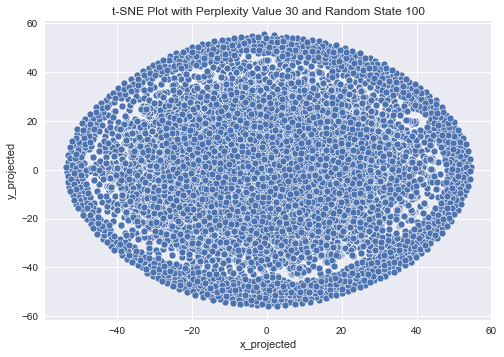

In [211]:
perp = 30
rs = 100
tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
data_tsne = tsne.fit_transform(tfidf_matrix_np)
df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
# df_combo = pd.concat([df, df_tsne], axis=1)
sns.scatterplot(x='x_projected',y='y_projected', data=df_tsne)
plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
# plt.legend(bbox_to_anchor=(1,1))
plt.show()

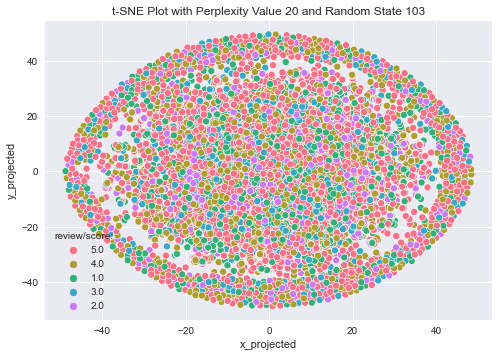

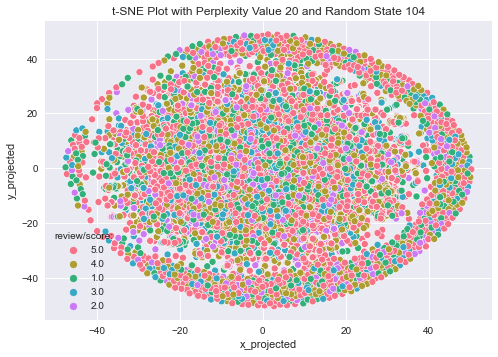

--------------------------------------------


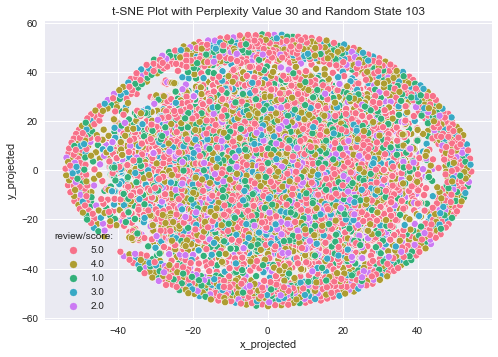

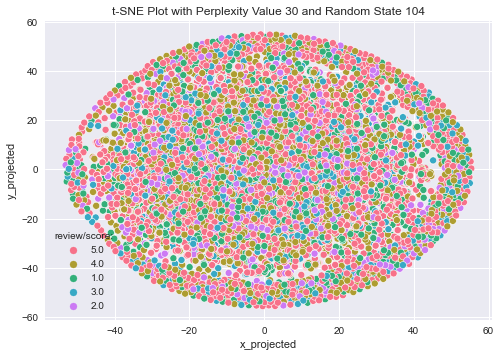

--------------------------------------------


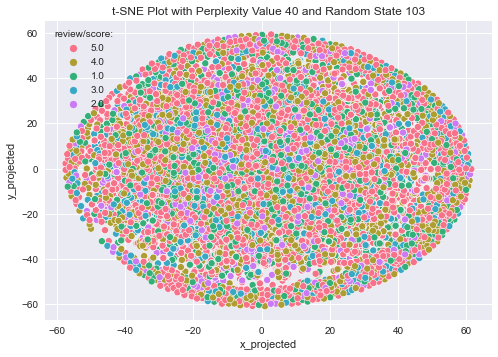

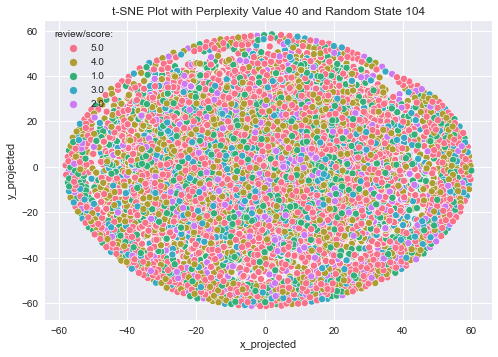

--------------------------------------------


In [213]:
for perp in [20, 30, 40]:
    for rs in [103,104]:
        tsne = TSNE(n_components=2, perplexity=perp, random_state=rs)
        data_tsne = tsne.fit_transform(tfidf_matrix_np)
        df_tsne = pd.DataFrame(data_tsne, columns=['x_projected', 'y_projected'])
        df_combo = pd.concat([df3, df_tsne], axis=1)
        sns.scatterplot(x='x_projected',y='y_projected', hue='review/score:', palette=sns.color_palette("husl", 5), data=df_combo)
        plt.title('t-SNE Plot with Perplexity Value %s and Random State %s' %(perp, rs))
#         plt.legend(bbox_to_anchor=(1,1))
        plt.show()
    print('--------------------------------------------')